<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [2]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import re

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [3]:
with open('sat_scores.csv','r') as f:
    data = f.readlines()

raw_c = []
for dat in data:
    for d in dat.split():
        raw_c.append(d.split(','))

f.close()
print raw_c

[['State', 'Rate', 'Verbal', 'Math'], ['CT', '82', '509', '510'], ['NJ', '81', '499', '513'], ['MA', '79', '511', '515'], ['NY', '77', '495', '505'], ['NH', '72', '520', '516'], ['RI', '71', '501', '499'], ['PA', '71', '500', '499'], ['VT', '69', '511', '506'], ['ME', '69', '506', '500'], ['VA', '68', '510', '501'], ['DE', '67', '501', '499'], ['MD', '65', '508', '510'], ['NC', '65', '493', '499'], ['GA', '63', '491', '489'], ['IN', '60', '499', '501'], ['SC', '57', '486', '488'], ['DC', '56', '482', '474'], ['OR', '55', '526', '526'], ['FL', '54', '498', '499'], ['WA', '53', '527', '527'], ['TX', '53', '493', '499'], ['HI', '52', '485', '515'], ['AK', '51', '514', '510'], ['CA', '51', '498', '517'], ['AZ', '34', '523', '525'], ['NV', '33', '509', '515'], ['CO', '31', '539', '542'], ['OH', '26', '534', '439'], ['MT', '23', '539', '539'], ['WV', '18', '527', '512'], ['ID', '17', '543', '542'], ['TN', '13', '562', '553'], ['NM', '13', '551', '542'], ['IL', '12', '576', '589'], ['KY', '12

In [4]:
#Dictionary part
raw_d = {}
for k in raw_c[0]:
    raw_d[k] = [a[raw_c[0].index(k)] for a in raw_c[1:]]
print raw_d

{'Math': ['510', '513', '515', '505', '516', '499', '499', '506', '500', '501', '499', '510', '499', '489', '501', '488', '474', '526', '499', '527', '499', '515', '510', '517', '525', '515', '542', '439', '539', '512', '542', '553', '542', '589', '550', '545', '572', '589', '580', '554', '568', '561', '577', '562', '596', '550', '570', '603', '582', '599', '551', '514'], 'State': ['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE', 'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI', 'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM', 'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA', 'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], 'Rate': ['82', '81', '79', '77', '72', '71', '71', '69', '69', '68', '67', '65', '65', '63', '60', '57', '56', '55', '54', '53', '53', '52', '51', '51', '34', '33', '31', '26', '23', '18', '17', '13', '13', '12', '12', '11', '11', '9', '9', '9', '8', '8', '8', '7', '6', '6', '5', '5', '4', '4', '4', 

<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [5]:
sat_score_d = pd.DataFrame(raw_d, columns=['State', 'Rate', 'Verbal','Math'])
sat_score_d.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [6]:
sat_score_c = pd.read_csv('sat_scores.csv')
sat_score_c.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


In [7]:
sat_score_d.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [8]:
sat_score_c.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [9]:
print sat_score_c.head(10)

  State  Rate  Verbal  Math
0    CT    82     509   510
1    NJ    81     499   513
2    MA    79     511   515
3    NY    77     495   505
4    NH    72     520   516
5    RI    71     501   499
6    PA    71     500   499
7    VT    69     511   506
8    ME    69     506   500
9    VA    68     510   501


<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [10]:
data_dict = {'Colnames':sat_score_c.columns, 'Type':[sat_score_c.dtypes], 'Description':['State', 'Rate of failure per state', 'Average Verbal Scores', 'Average Math Scores'], 'Shape':sat_score_c.shape}
print data_dict

{'Shape': (52, 4), 'Colnames': Index([u'State', u'Rate', u'Verbal', u'Math'], dtype='object'), 'Type': [State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object], 'Description': ['State', 'Rate of failure per state', 'Average Verbal Scores', 'Average Math Scores']}


<code style="color:#ff0000;">
Suggested answer:

import pprint

data_dict = {
    'State':{
        'type':sat.State.dtype,
        'description':'State id.'
    },
    'Rate':{
        'type':sat.Rate.dtype,
        'description':'Percent of students that took SAT.'
    },
    'Math':{
        'type':sat.Math.dtype,
        'description':'Average math scores on SAT.'
    },
    'Verbal':{
        'type':sat.Verbal.dtype,
        'description':'Average verbal scores on SAT.'
    },
    'dataset_shape':sat.shape
}

pprint(data_dict)

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

In [11]:
#Bunch of code for resizing the plot

import matplotlib.pyplot as plt
 
# Get current size
fig_size = plt.rcParams["figure.figsize"]
 
# Prints: [8.0, 6.0]
print "Current size:", fig_size
 
# Set figure width to 12 and height to 9
fig_size[0] = 5
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

Current size: [6.0, 4.0]


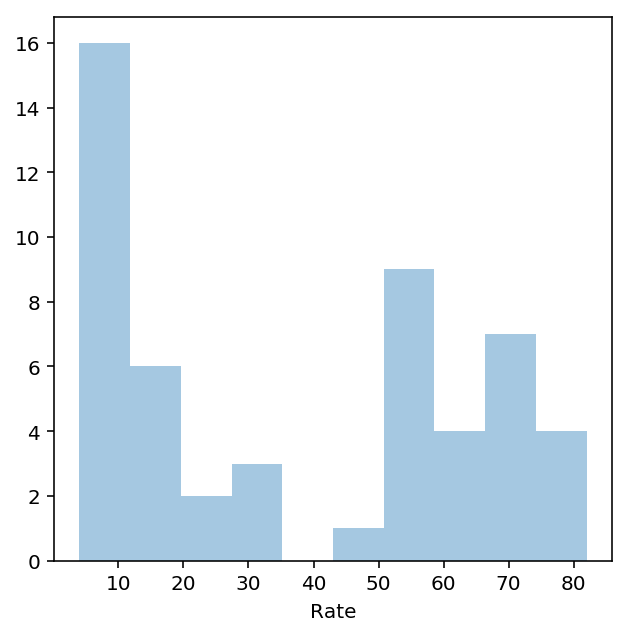

In [12]:
#Tried plotting the 3 graphs together in the same space using plt.subplot() but apparently the first graph keeps becoming blank
#so I kinda gave up
import seaborn as sns

sns.distplot(sat_score_c['Rate'], bins=10, kde=False)


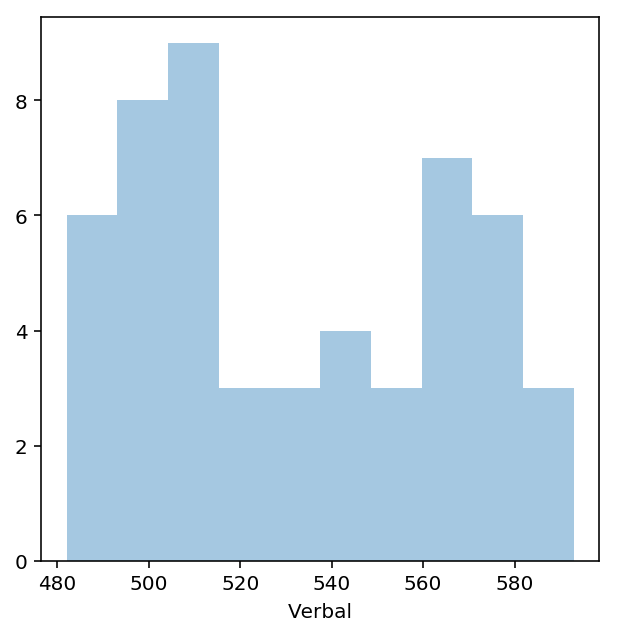

In [13]:
sns.distplot(sat_score_c['Verbal'], bins=10, kde=False)

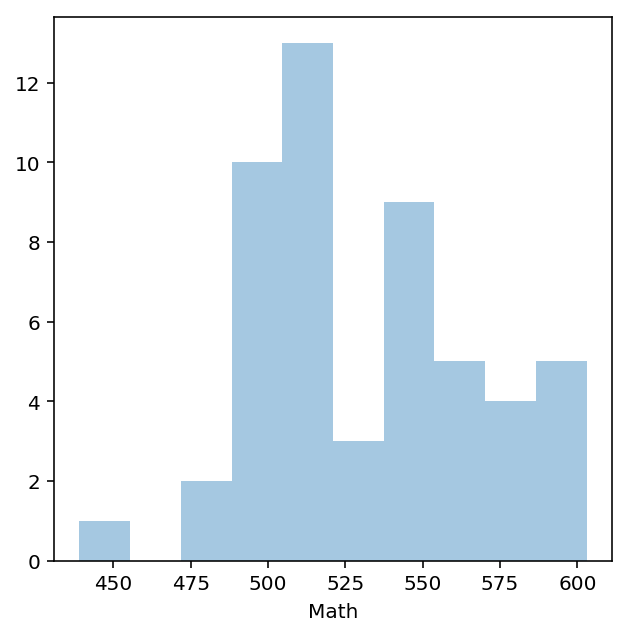

In [14]:
sns.distplot(sat_score_c['Math'], bins=10, kde=False)

<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

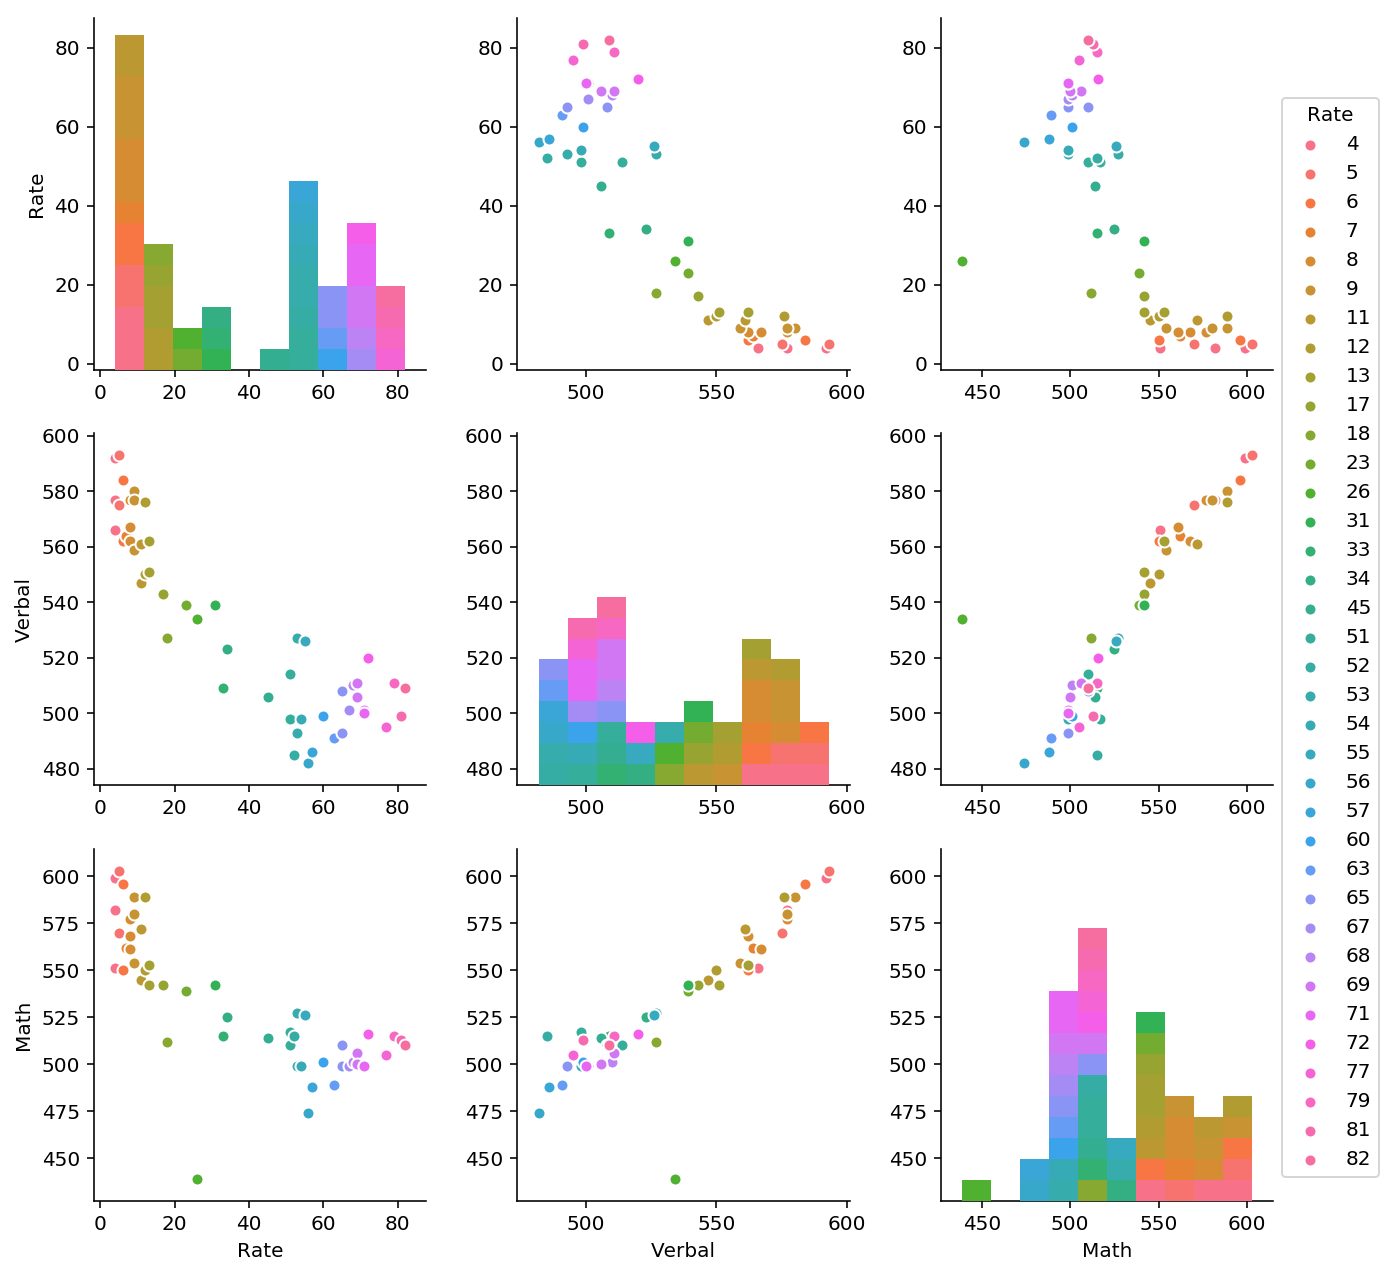

In [15]:
sns.pairplot(sat_score_c.loc[:,['Rate', 'Verbal', 'Math']], hue='Rate', size=3)

<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

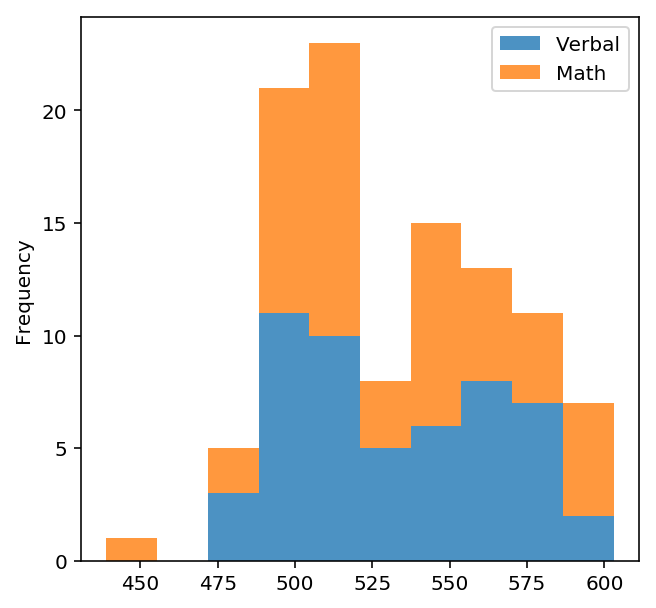

In [16]:
sat_score_c.loc[:,['Verbal','Math']].plot.hist(stacked=True, alpha=0.8)

<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

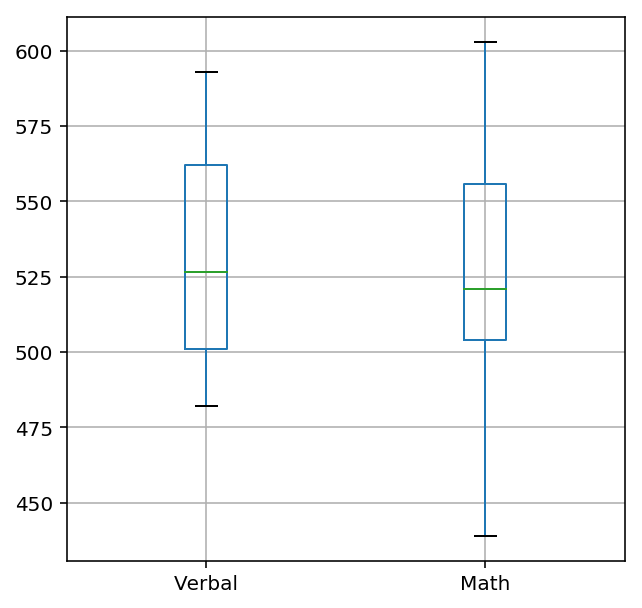

In [17]:
sat_score_c.boxplot(column=['Verbal', 'Math'])

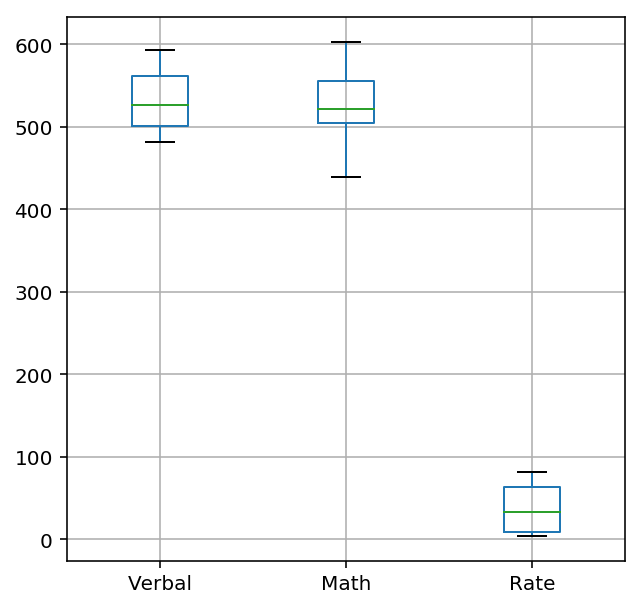

In [18]:
sat_score_c.boxplot(column=['Verbal', 'Math', 'Rate'])
#Looks totally skewed because of Rate's values as compared to Verbal and Math

<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


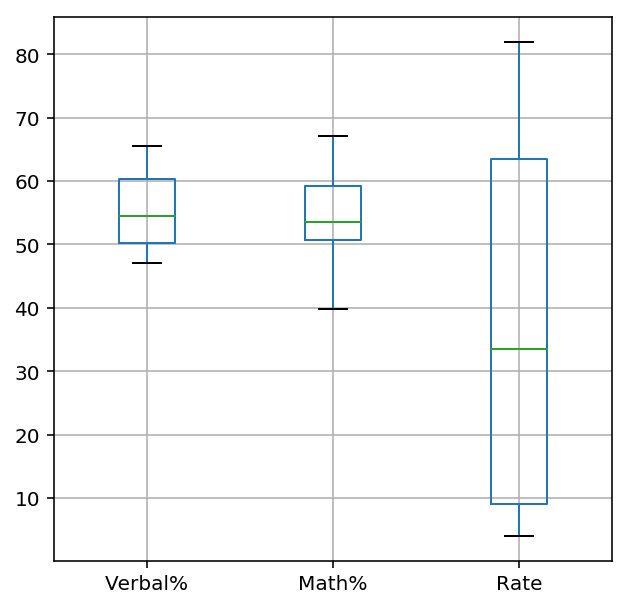

In [19]:
#Since rate is based on percentage, it would also be nice to represent the data of Verbal and Math as percentages as well.
#According to SAT score calculation, the minimum score is 200 and the maximum is 800
#So we subtract 200 off the mean score per state, divide by 600 and multiply by 100 to get percentage score.
sat_score_c['Math%']=sat_score_c['Math'].apply(lambda x: (x-200)/600.*100)
sat_score_c['Verbal%']=sat_score_c['Verbal'].apply(lambda x: (x-200)/600.*100)
sat_score_c.boxplot(column=['Verbal%', 'Math%', 'Rate'])

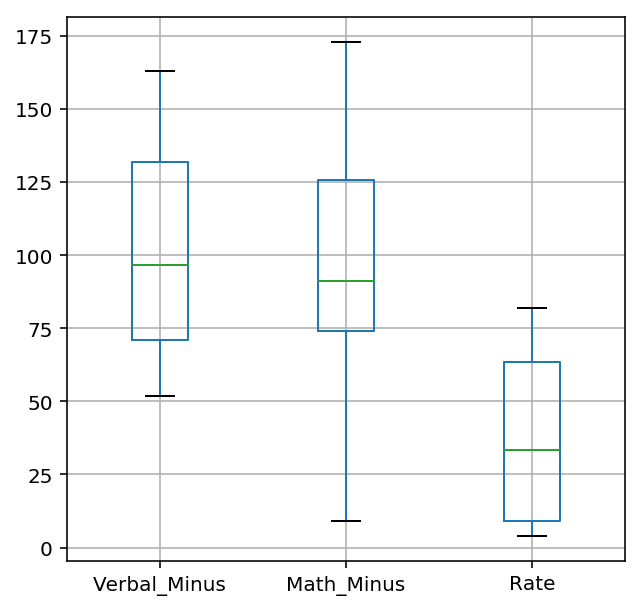

In [20]:
#Alternatively, just shave off part of the minimum value in both Verbal and Math to match up to rate
sat_score_c['Math_Minus']=sat_score_c['Math']-430
sat_score_c['Verbal_Minus']=sat_score_c['Verbal']-430
sat_score_c.boxplot(column=['Verbal_Minus', 'Math_Minus', 'Rate'])

In [21]:
def normalize(data):
    return (data - np.mean(data))/np.std(data)

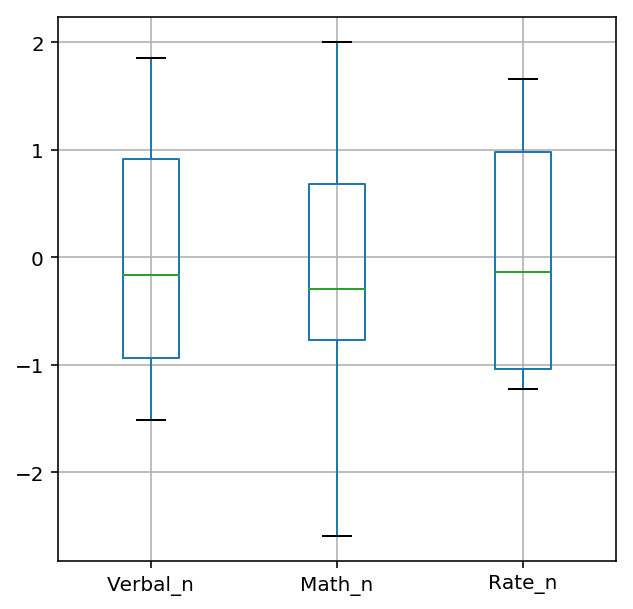

In [22]:
#Last but not least, try normalizing the data
sat_score_c['Math_n']= normalize(sat_score_c['Math'])
sat_score_c['Verbal_n']= normalize(sat_score_c['Verbal'])
sat_score_c['Rate_n']= normalize(sat_score_c['Rate'])
sat_score_c.boxplot(column=['Verbal_n', 'Math_n', 'Rate_n'])
#Apparently now this is visually pleasing but we must remember how it came about

In [23]:
#Reset
sat_score_c = sat_score_c.loc[:,['State','Rate','Verbal','Math']]
sat_score_c.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [24]:
state_h = sat_score_c[sat_score_c['Verbal']>(np.mean(sat_score_c['Verbal']))]['State']
print len(state_h)

24


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [25]:
state_m = sat_score_c[sat_score_c['Verbal']>(np.median(sat_score_c['Verbal']))]['State']
print len(state_m)

26


<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

<p style="color:#ff0000;">
Note that 'All' is not a state.
<p style="color:#ff0000;">
The distribution of verbal scores is actually not significantly skewed positively or negatively.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [26]:
sat_score_c['Verbal - Math']=sat_score_c['Verbal'] - sat_score_c['Math']
sat_score_c.head()

,State,Rate,Verbal,Math,Verbal - Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [27]:
df_1 = sat_score_c.sort_values('Verbal - Math', ascending=False).head(10)
df_2 = sat_score_c.sort_values('Verbal - Math', ascending=True).head(10)


In [28]:
df_1.head(3)

,State,Rate,Verbal,Math,Verbal - Math
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [29]:
df_2.head(3)

,State,Rate,Verbal,Math,Verbal - Math
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [30]:
rate = sat_score_c['Rate']
verb = sat_score_c['Verbal']
math = sat_score_c['Math']
np.corrcoef([rate, verb, math])

array([[ 1.        , -0.88643214, -0.77374621],
       [-0.88643214,  1.        ,  0.89987085],
       [-0.77374621,  0.89987085,  1.        ]])

<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

<p style="color:#ff0000;">Explanation?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [31]:
sat_score_c.describe()

#Count = Number of data points. They should all be the same.
#Mean = Mean of the data points in the particular column
#std = Standard Deviation of the column
#min = Minimum value of the column
#25% = Value of the 25th percentile of values in the column in ascending order
#50% = Value of the 50th percentile...
#75% = Value of the 75th...
#Max = Maximum value of the column

,Rate,Verbal,Math,Verbal - Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

1. Covariance matrix shows the relationship between the variances between the data in each column. Correlation is different in that it shows the normalized value
2. Normalization
3. Correlation matrix is more useful because we can measure more clearly the correlation strength between columns, since there is a clear range between -1 to 1. Covariance only tells us whether the relationship is positive or negative, but strength wise it is too vague.

In [32]:
np.cov([rate, verb, math])

array([[  745.38763198,  -804.35595777,  -760.80392157],
       [ -804.35595777,  1104.64668175,  1077.14705882],
       [ -760.80392157,  1077.14705882,  1297.07843137]])

<p style="color:#ff0000;">Explanation?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [33]:
drug_use_d = pd.read_csv('drug-use-by-age.csv')
drug_use_d.head()

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [34]:
drug_use_d.shape

(17, 28)

In [35]:
drug_use_d.dtypes
#Now, to check all object types since use and frequency are supposed to be number values

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency           object
crack-use                  float64
crack-frequency             object
heroin-use                 float64
heroin-frequency            object
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency          object
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency         object
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency              object
sedative-use               float64
sedative-frequency         float64
dtype: object

In [36]:
drug_use_d[drug_use_d['age'].str.isnumeric()!= True]

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
10,22-23,4707,84.2,52.0,28.4,52.0,4.5,5.0,0.5,5.0,...,1.7,17.5,4.4,12.0,3.6,10.0,0.6,46.0,0.2,52.0
11,24-25,4591,83.1,52.0,24.9,60.0,4.0,6.0,0.5,6.0,...,1.3,20.0,4.3,10.0,2.6,10.0,0.7,21.0,0.2,17.5
12,26-29,2628,80.7,52.0,20.8,52.0,3.2,5.0,0.4,6.0,...,1.2,13.5,4.2,10.0,2.3,7.0,0.6,30.0,0.4,4.0
13,30-34,2864,77.5,52.0,16.4,72.0,2.1,8.0,0.5,15.0,...,0.9,46.0,3.6,8.0,1.4,12.0,0.4,54.0,0.4,10.0
14,35-49,7391,75.0,52.0,10.4,48.0,1.5,15.0,0.5,48.0,...,0.3,12.0,1.9,6.0,0.6,24.0,0.2,104.0,0.3,10.0
15,50-64,3923,67.2,52.0,7.3,52.0,0.9,36.0,0.4,62.0,...,0.4,5.0,1.4,10.0,0.3,24.0,0.2,30.0,0.2,104.0
16,65+,2448,49.3,52.0,1.2,36.0,0.0,-,0.0,-,...,0.0,-,0.2,5.0,0.0,364.0,0.0,-,0.0,15.0


In [37]:
drug_use_d[drug_use_d['cocaine-frequency'].str.isnumeric()!= True]['cocaine-frequency']

0      5.0
1      1.0
2      5.5
3      4.0
4      7.0
5      5.0
6      5.0
7      5.5
8      8.0
9      5.0
10     5.0
11     6.0
12     5.0
13     8.0
14    15.0
15    36.0
16       -
Name: cocaine-frequency, dtype: object

Apparently a lot of the object types of the frequency values is because the corresponding use value per category of drug is 0, hence there would naturally be no data on the frequency. They are represented by '-'.

So we simply replace the dash with 0.

In [38]:
drug_use_dr = drug_use_d.replace('-',0)
drug_use_dr.iloc[:,2:] = drug_use_dr.iloc[:,2:].apply(pd.to_numeric)
drug_use_dr.dtypes

age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [39]:
drug_use_dr.describe().T

,count,mean,std,min,25%,50%,75%,max
n,17.0,3251.058824,1297.890426,2223.0,2469.0,2798.0,3058.0,7391.0
alcohol-use,17.0,55.429412,26.878866,3.9,40.1,64.6,77.5,84.2
alcohol-frequency,17.0,33.352941,21.318833,3.0,10.0,48.0,52.0,52.0
marijuana-use,17.0,18.923529,11.959752,1.1,8.7,20.8,28.4,34.0
marijuana-frequency,17.0,42.941176,18.362566,4.0,30.0,52.0,52.0,72.0
cocaine-use,17.0,2.176471,1.816772,0.0,0.5,2.0,4.0,4.9
cocaine-frequency,17.0,7.411765,8.014119,0.0,5.0,5.0,7.0,36.0
crack-use,17.0,0.294118,0.235772,0.0,0.0,0.4,0.5,0.6
crack-frequency,17.0,12.382353,17.361532,0.0,2.0,6.0,15.0,62.0
heroin-use,17.0,0.352941,0.333762,0.0,0.1,0.2,0.6,1.1


### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**

Hypothesis: tbc

In [40]:
#Get data based on use only
use_col = ['age', 'n']
add_col = [col for col in drug_use_dr.columns if re.search('.*-use',col) != None]
use_col.extend(add_col)
print use_col

['age', 'n', 'alcohol-use', 'marijuana-use', 'cocaine-use', 'crack-use', 'heroin-use', 'hallucinogen-use', 'inhalant-use', 'pain-releiver-use', 'oxycontin-use', 'tranquilizer-use', 'stimulant-use', 'meth-use', 'sedative-use']


In [41]:
use_df = drug_use_dr[use_col]
use_df.head()

,age,n,alcohol-use,marijuana-use,cocaine-use,crack-use,heroin-use,hallucinogen-use,inhalant-use,pain-releiver-use,oxycontin-use,tranquilizer-use,stimulant-use,meth-use,sedative-use
0,12,2798,3.9,1.1,0.1,0.0,0.1,0.2,1.6,2.0,0.1,0.2,0.2,0.0,0.2
1,13,2757,8.5,3.4,0.1,0.0,0.0,0.6,2.5,2.4,0.1,0.3,0.3,0.1,0.1
2,14,2792,18.1,8.7,0.1,0.0,0.1,1.6,2.6,3.9,0.4,0.9,0.8,0.1,0.2
3,15,2956,29.2,14.5,0.5,0.1,0.2,2.1,2.5,5.5,0.8,2.0,1.5,0.3,0.4
4,16,3058,40.1,22.5,1.0,0.0,0.1,3.4,3.0,6.2,1.1,2.4,1.8,0.3,0.2


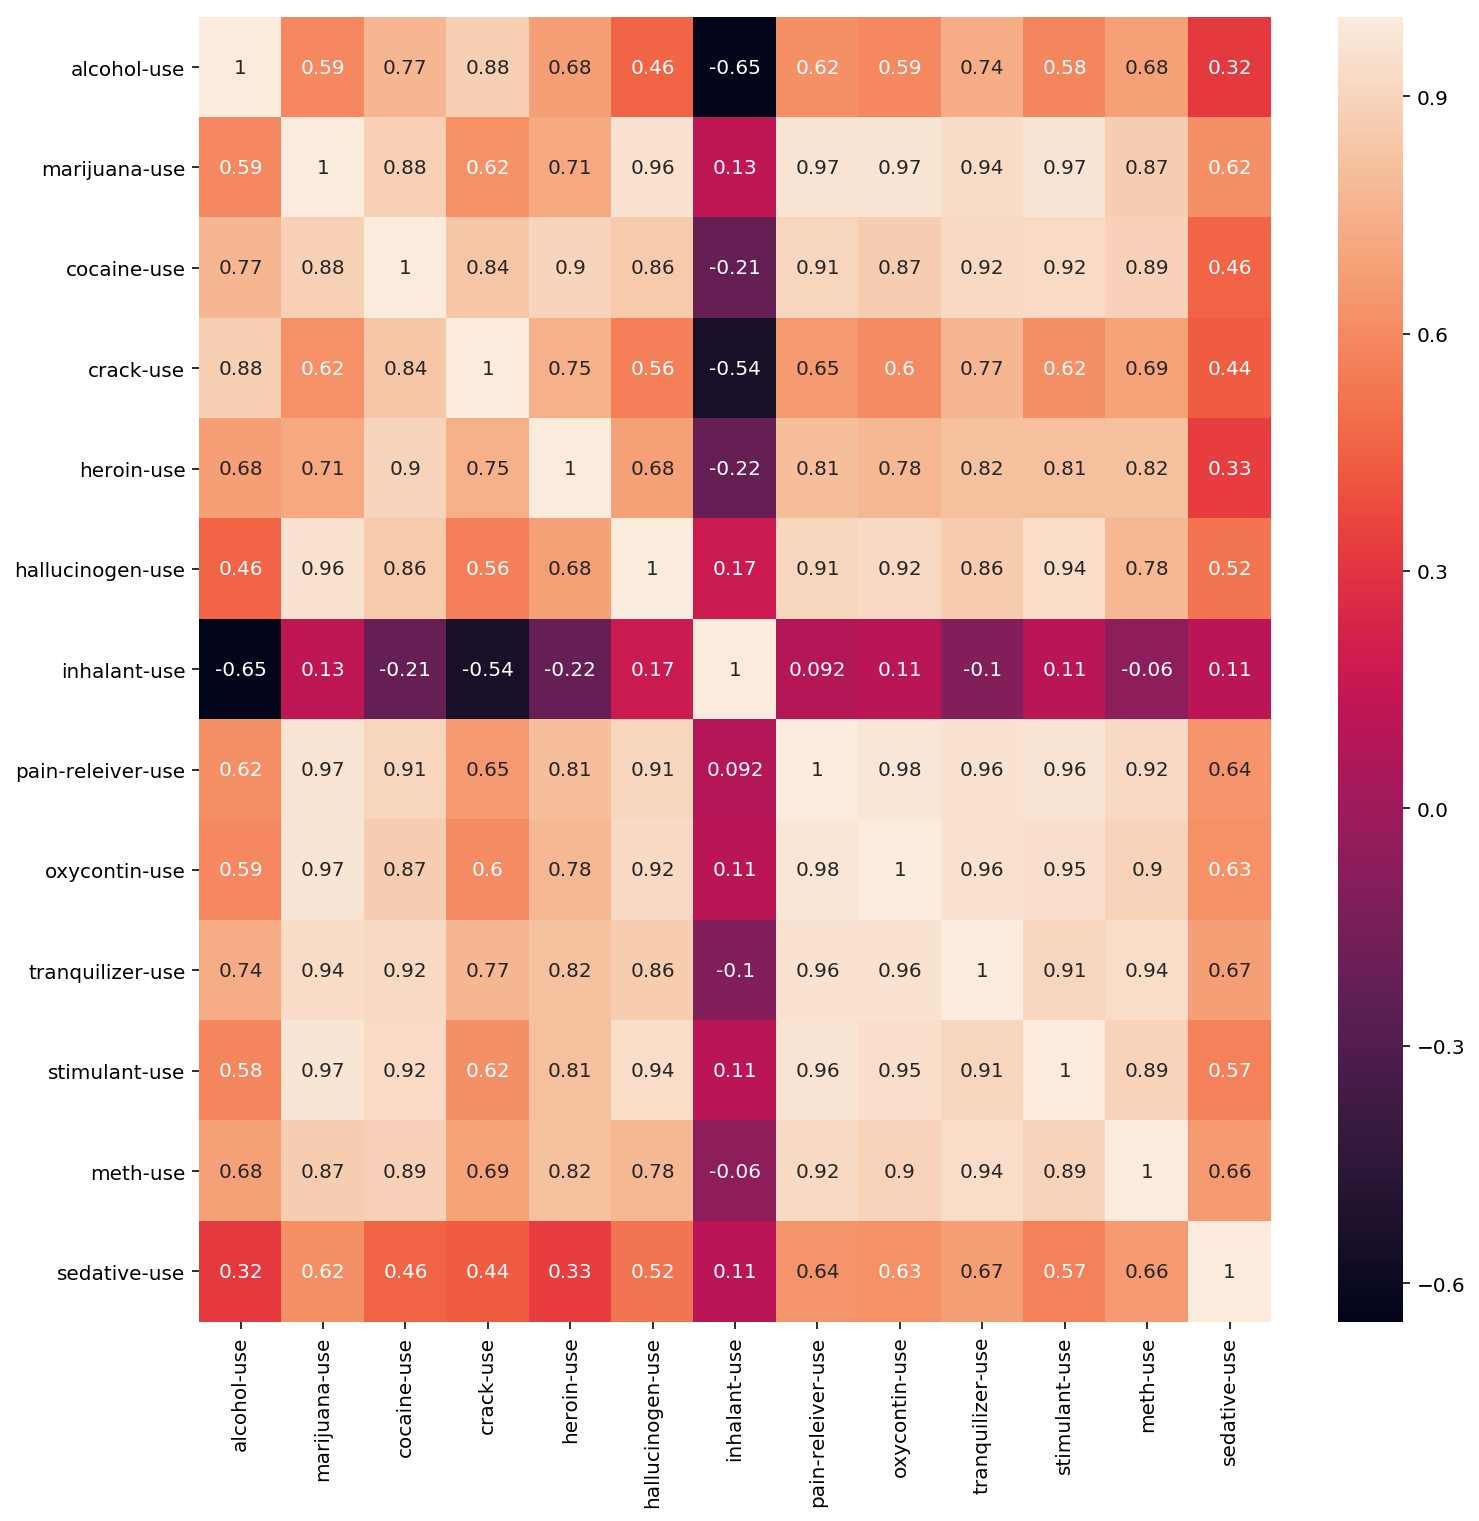

In [42]:
#Show correlation of drug usage alongside other drugs, or otherwise to notice how closely the trend of drug usage across age
#compares with the trend of other drugs.
plt.figure(figsize=(12,12))
sns.heatmap(use_df.loc[:,'alcohol-use':].corr(), annot=True)

Inferring from the heatmap above, it seems that most of the drug uses closely correlate with each other i.e. drug usage rise and fall closely with each other

With the exception of inhalant use, it shares almost no correlation with any other drug other than alcohol which it is very negative. Time to investigate!

Crack is the other drug that shares a negative correlation with inhalant, and most highly correlated with alcohol. Hopefully by belonging in the drug category it will be more representative as compared to alcohol.

In [43]:
ohlook_df = drug_use_dr[['age','n','alcohol-use','crack-use','inhalant-use','alcohol-frequency','crack-frequency','inhalant-frequency']]
ohlook_df

,age,n,alcohol-use,crack-use,inhalant-use,alcohol-frequency,crack-frequency,inhalant-frequency
0,12,2798,3.9,0.0,1.6,3.0,0.0,19.0
1,13,2757,8.5,0.0,2.5,6.0,3.0,12.0
2,14,2792,18.1,0.0,2.6,5.0,0.0,5.0
3,15,2956,29.2,0.1,2.5,6.0,9.5,5.5
4,16,3058,40.1,0.0,3.0,10.0,1.0,3.0
5,17,3038,49.3,0.1,2.0,13.0,21.0,4.0
6,18,2469,58.7,0.4,1.8,24.0,10.0,4.0
7,19,2223,64.6,0.5,1.4,36.0,2.0,3.0
8,20,2271,69.7,0.6,1.5,48.0,5.0,4.0
9,21,2354,83.2,0.5,1.4,52.0,17.0,2.0


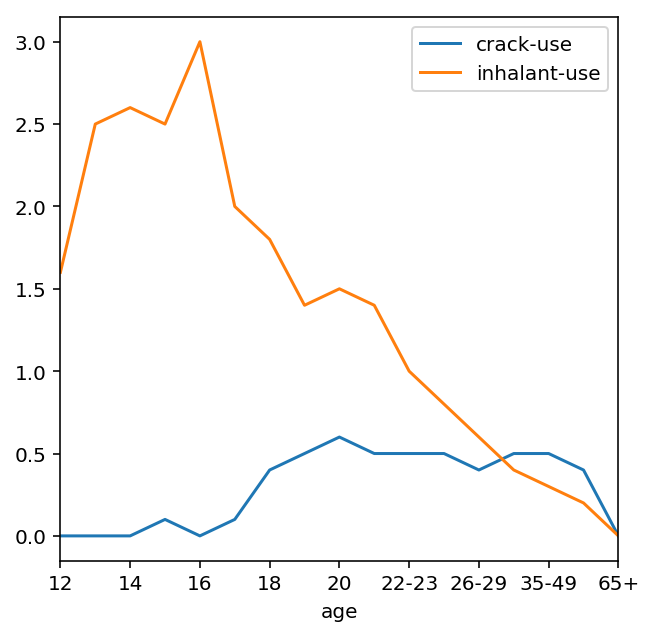

In [44]:
ohlook_df[['age','crack-use','inhalant-use']].plot(x='age')

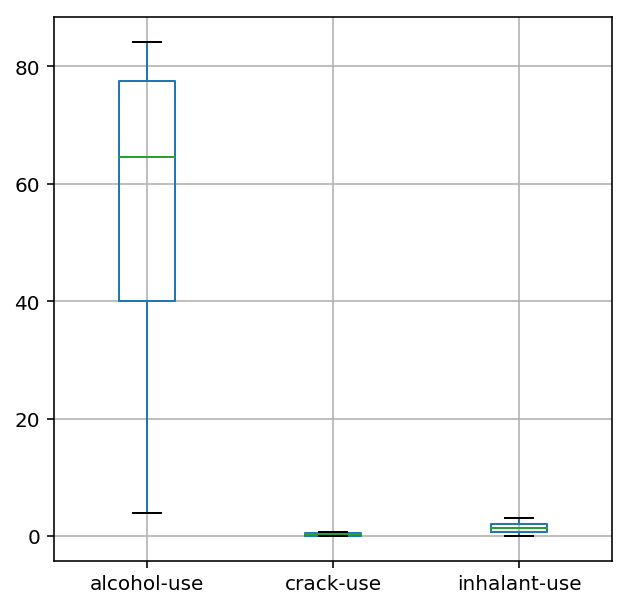

In [45]:
ohlook_df.boxplot(column=['alcohol-use','crack-use','inhalant-use'])

C:\Users\User\Anaconda2\lib\site-packages\pandas\core\indexing.py:337: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\User\Anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


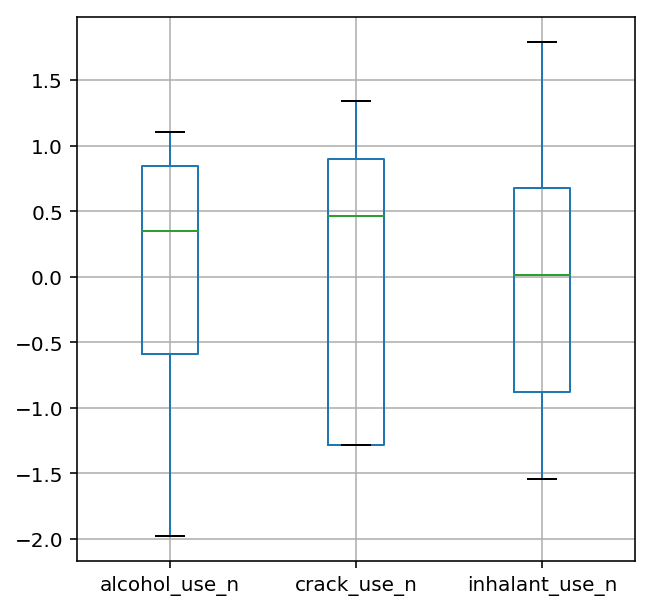

In [46]:
#I have no idea what happened to ohlook_df['alcohol_use_n']= whatever, it gave me an error!
ohlook_df.loc[:,'alcohol_use_n'] = normalize(ohlook_df['alcohol-use'])
ohlook_df.loc[:,'crack_use_n'] = normalize(ohlook_df['crack-use'])
ohlook_df.loc[:,'inhalant_use_n'] = normalize(ohlook_df['inhalant-use'])

ohlook_df.boxplot(column=['alcohol_use_n','crack_use_n','inhalant_use_n'])

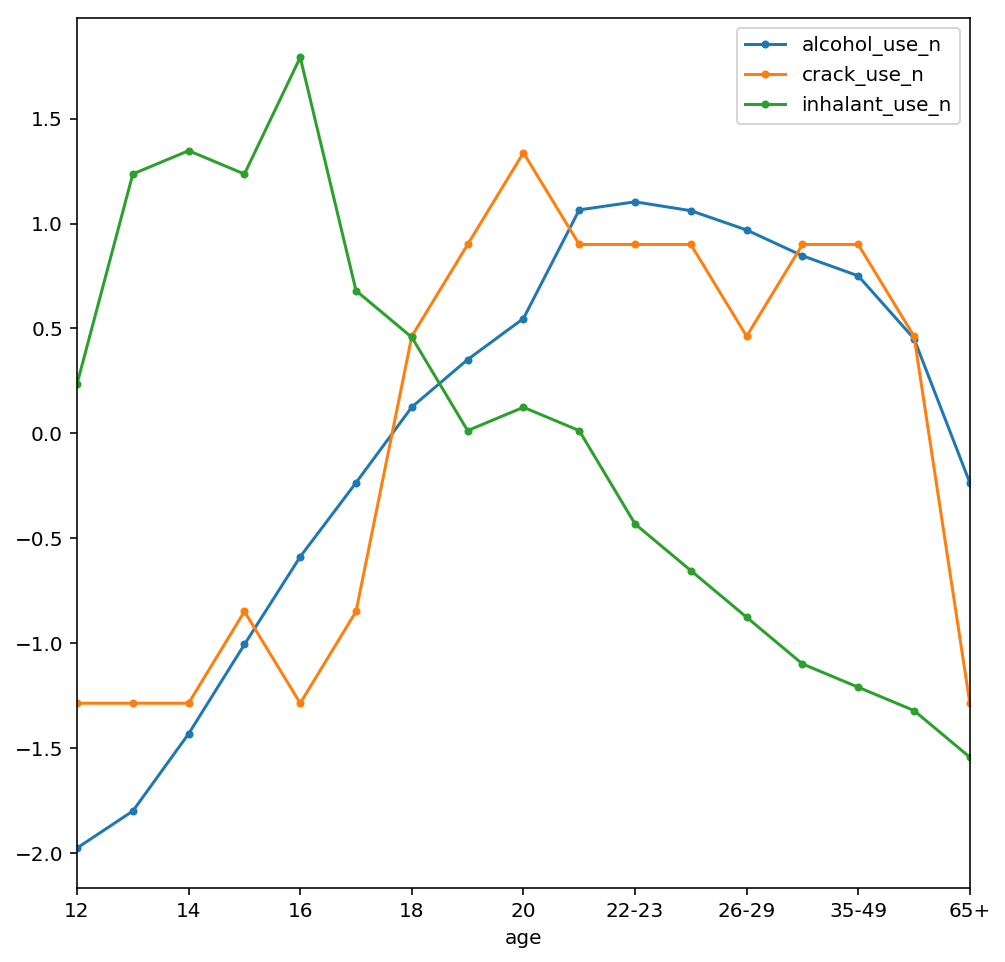

In [47]:
ohlook_df[['age','alcohol_use_n','crack_use_n','inhalant_use_n']].plot(x='age', figsize=(8,8), marker='.')

## Now the hypothesis part: To test the hypothesis on correlation between alcohol and crack

Define $\alpha$ = 0.05 and Number of data points = 17

And define null and alternate hypothesis:

H0 = 0

H1 != 0

To perform 2 tailed test



<p style="color:#ff0000;">
Suggest to rephrase null hypothesis as:
H0: Correlation coefficient between alcohol-use and crack-use equals 0
H1: Correlation coefficient between alcohol-use and crack-use is not 0

In [48]:
ohlookie = ohlook_df[['age','alcohol-use','crack-use']]
ohlookie.head()

,age,alcohol-use,crack-use
0,12,3.9,0.0
1,13,8.5,0.0
2,14,18.1,0.0
3,15,29.2,0.1
4,16,40.1,0.0


In [66]:
corre=ohlookie[['alcohol-use','crack-use']].corr().iloc[0,1]
print "Correlation value is:",corre

Correlation value is: 0.877378036759


Assuming null hypothesis is true, equation for t-statistic: $$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$$

In [90]:
#Get t-statistic
t = (corre*((17-2)**0.5))/((1-(corre)**2)**0.5)
print t

7.08226852666


We can get the critical value from here:
![](score.png)

Since 7.0822 >> 2.131, we reject the null hypothesis in favour of the alternate hypothesis at 5% significance level.

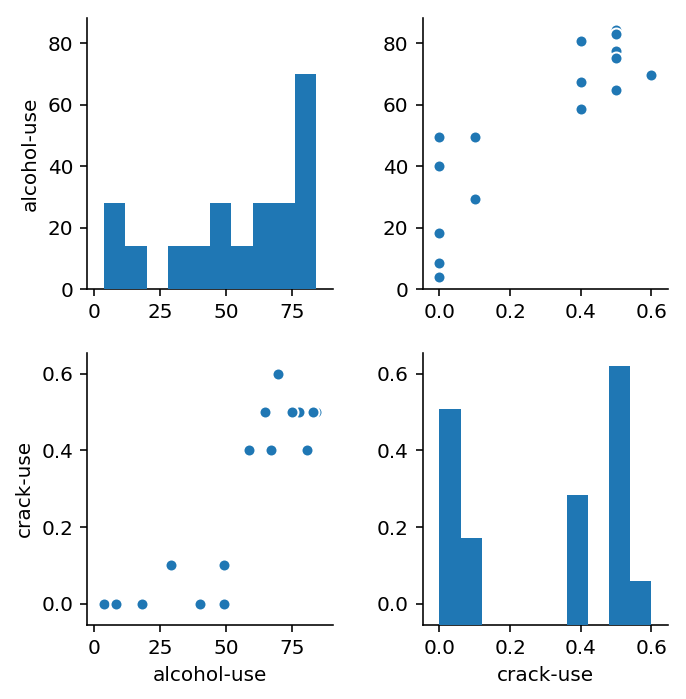

In [49]:
sns.pairplot(ohlookie)

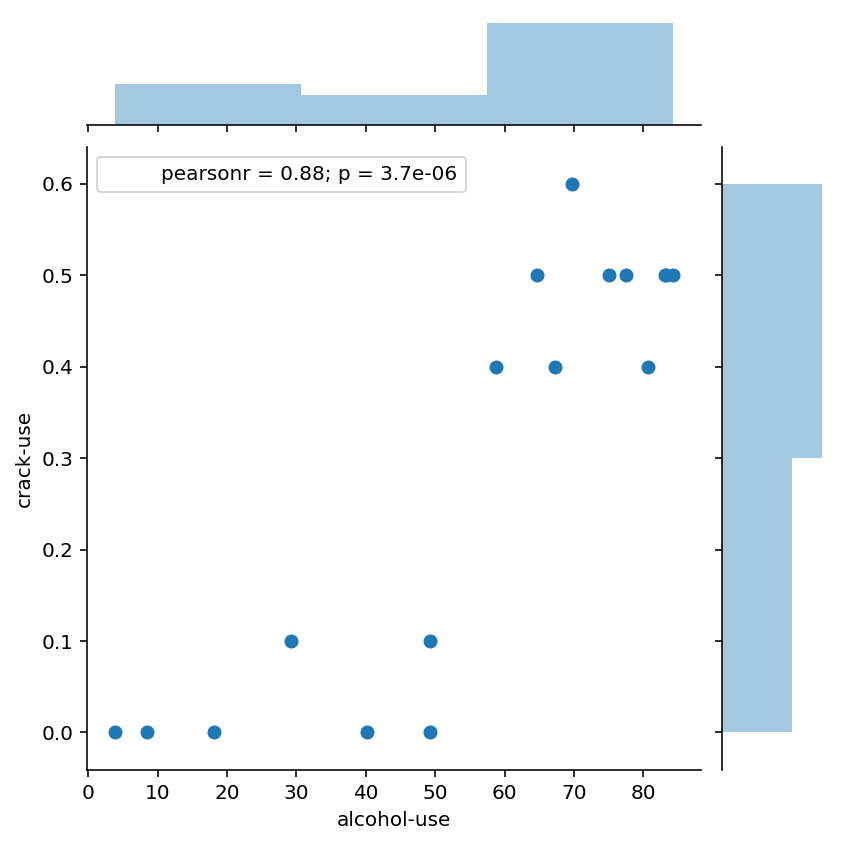

In [50]:
sns.jointplot(ohlookie['alcohol-use'],ohlookie['crack-use'])

The datapoints are few, lets bootstrap them!!!

In [51]:
#I openly admit to copying from lecture notes here

def bootstrap_r(x, y, iterations=1000):
    boot_r = []
    inds = range(len(x))
    for i in range(iterations):
        boot_inds = np.random.choice(inds, replace=True, size=len(inds))
        x_b = x[boot_inds]
        y_b = y[boot_inds]
        boot_r.append(stats.pearsonr(x_b, y_b)[0])
    return boot_r

In [52]:
booted = bootstrap_r(ohlookie['alcohol-use'],ohlookie['crack-use'])

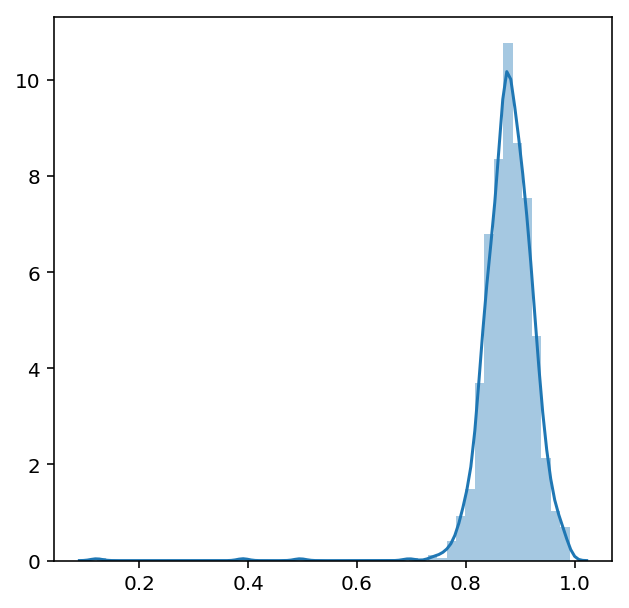

In [86]:
sns.distplot(booted)

In [79]:
percentile = stats.percentileofscore(booted, corre)
print percentile
print "close enough"

48.3
close enough


In [76]:
print stats.scoreatpercentile(booted, 99.5)
print corre
print stats.scoreatpercentile(booted, 0.5)

0.978144050883
0.877378036759
0.745338373338


## Other random interesting stuff

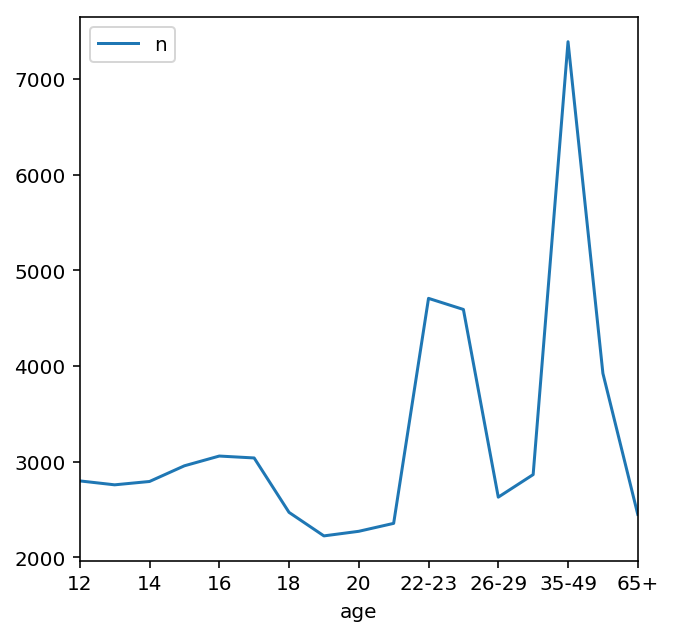

In [77]:
#Look at the number of people in each age group surveyed:
use_df[['age','n']].plot(x='age', y='n')
#This particular data won't be needed here

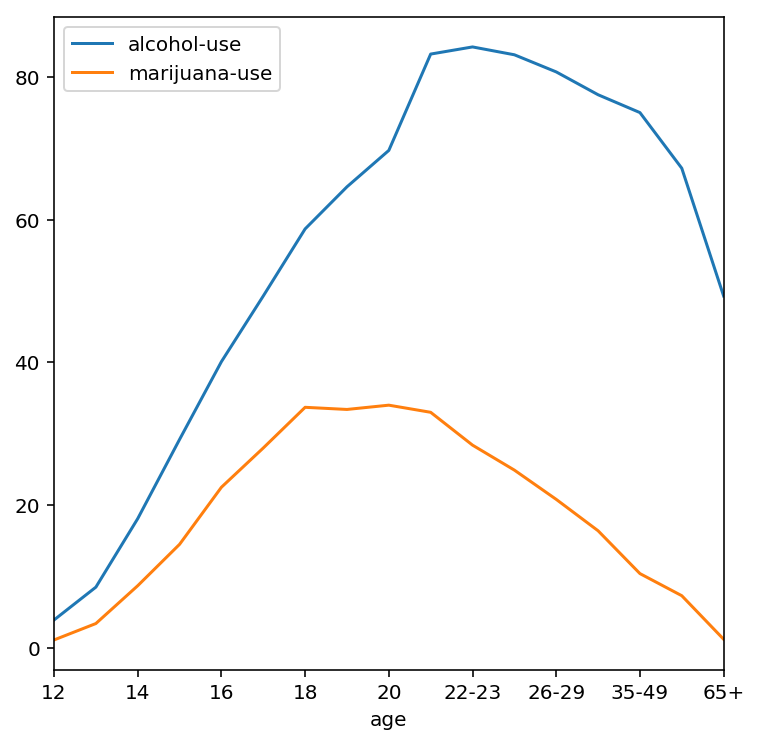

In [106]:
#Measure percentage of alcohol and marijuana use across age groups
use_df[['age','alcohol-use','marijuana-use']].plot(x='age', figsize=(6,6))

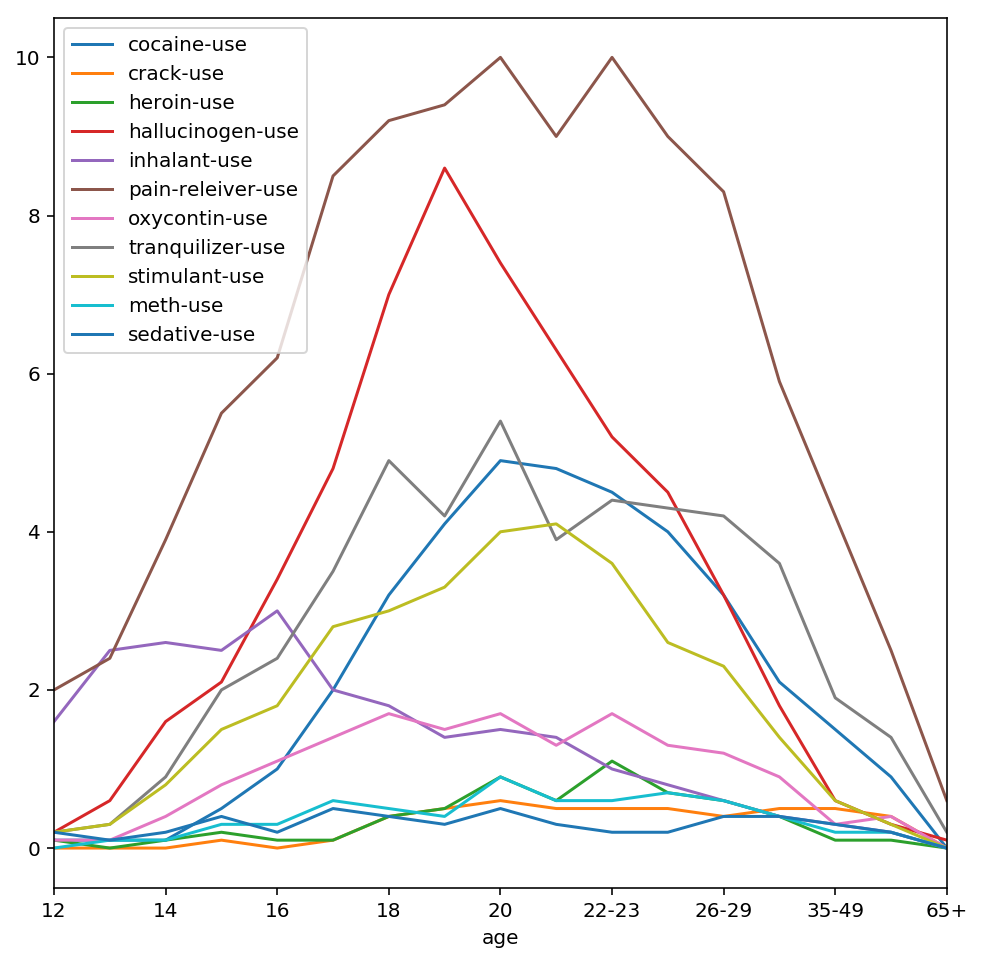

In [213]:
#Doing the same for other drugs
use_dfn = use_df.drop(['n','alcohol-use','marijuana-use'], axis=1)
use_dfn.plot(x='age', figsize=(8,8))

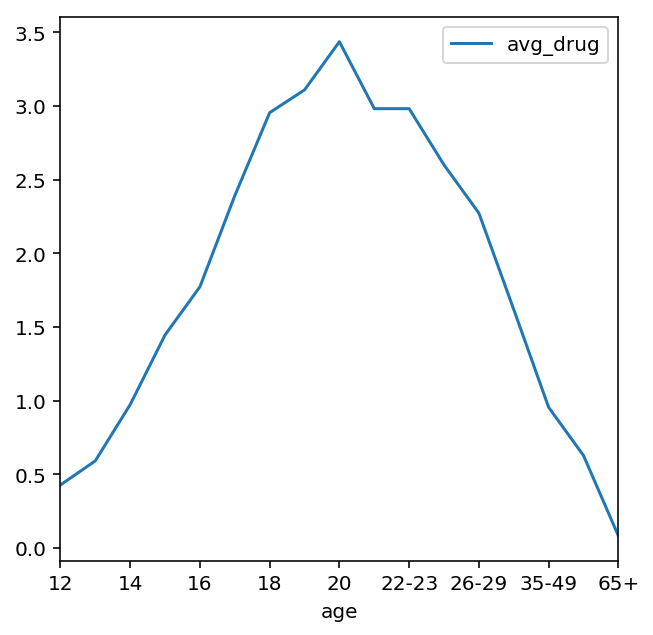

In [116]:
#Looking at average percentage of drug use across age groups, excluding alcohol and marijuana:
use_dfn['avg_drug'] = use_dfn.iloc[:,1:].apply(np.mean, axis=1)
use_dfn[['age','avg_drug']].plot(x='age')

**Report**



...

<p style="color:#ff0000;">
Conclusion?

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [216]:
rated = sat_score_c[['Rate']]
rated.head()

,Rate
0,82
1,81
2,79
3,77
4,72


In [258]:
rated.tail()

,Rate
47,5
48,4
49,4
50,4
51,45


In [218]:
#Since Rate most probably refers to the percentage, then we weed out extreme values: above 100 or below 0
rated[(rated['Rate'] > 100) | (rated['Rate'] < 0)]

,Rate


In [222]:
#Check for null values
rated[rated['Rate'].isnull()]

,Rate


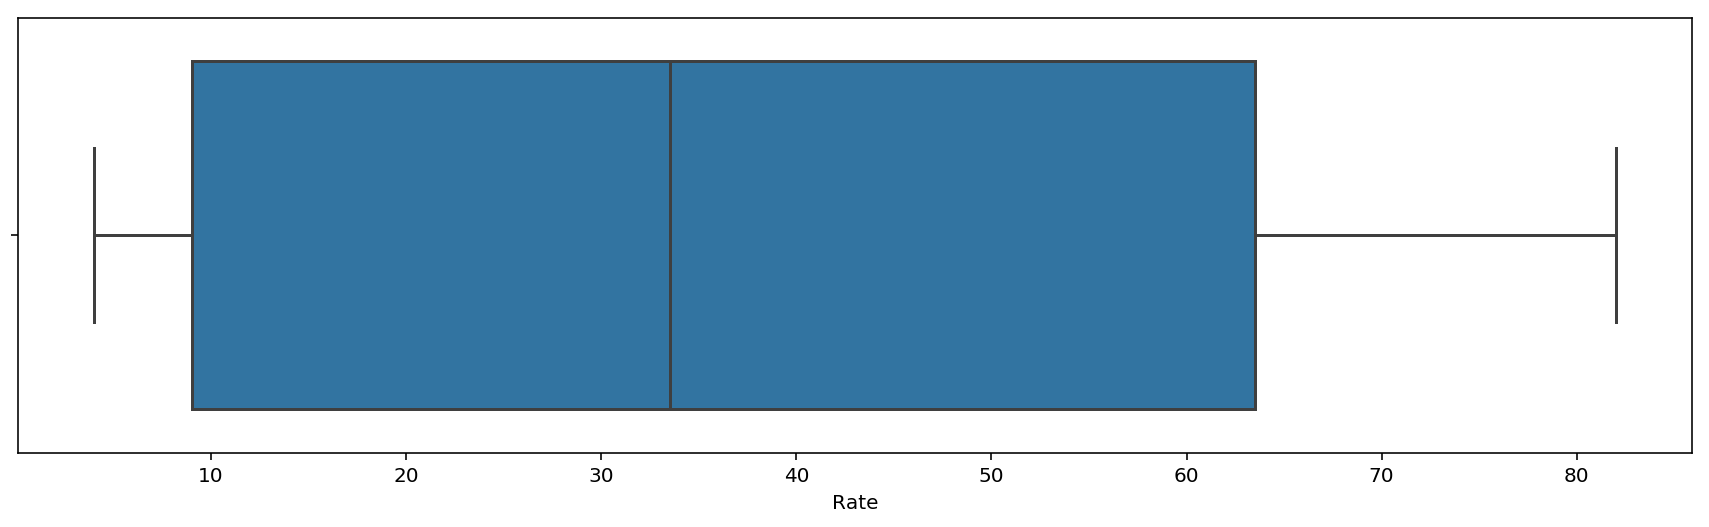

In [231]:
#Check graphically for outliers
plt.figure(figsize=(15,4))
sns.boxplot(x='Rate', data=rated)

Nope, nothing!

<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


Pearson correlation measures the linear relationship between two variables while spearman correlation measures the monotonic relation between two variables. Monotonic meaning the general direction (increase or decrease) and is measured according to rank.

In [245]:
#Pearson
sat_score_c.corr()

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal - Math,-0.101412,0.052600,-0.388219,1.000000


In [246]:
#Spearman
sat_score_c.corr(method='spearman')

,Rate,Verbal,Math,Verbal - Math
Rate,1.000000,-0.833294,-0.813275,-0.014266
Verbal,-0.833294,1.000000,0.905205,0.060244
Math,-0.813275,0.905205,1.000000,-0.239883
Verbal - Math,-0.014266,0.060244,-0.239883,1.000000


<img src="http://www.clker.com/cliparts/k/L/Z/0/Q/x/red-check-mark.svg" style="float: left; margin: 40px 30px 0px 0px; height: 40px">

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [247]:
sat_score_c['percentile'] = sat_score_c['Rate'].apply(lambda x:stats.percentileofscore(sat_score_c['Rate'], x))
sat_score_c.head()

,State,Rate,Verbal,Math,Verbal - Math,percentile
0,CT,82,509,510,-1,100.000000
1,NJ,81,499,513,-14,98.076923
2,MA,79,511,515,-4,96.153846
3,NY,77,495,505,-10,94.230769
4,NH,72,520,516,4,92.307692


In [250]:
sat_score_c[sat_score_c['State']=='CA'].percentile

23    56.730769
Name: percentile, dtype: float64

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

In [252]:
#Taking the alcohol use per age group:
alcohol_df = use_df[['age','alcohol-use']]
alcohol_df['percentile'] = alcohol_df['alcohol-use'].apply(lambda x:stats.percentileofscore(alcohol_df['alcohol-use'], x))


C:\Users\User\Anaconda2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


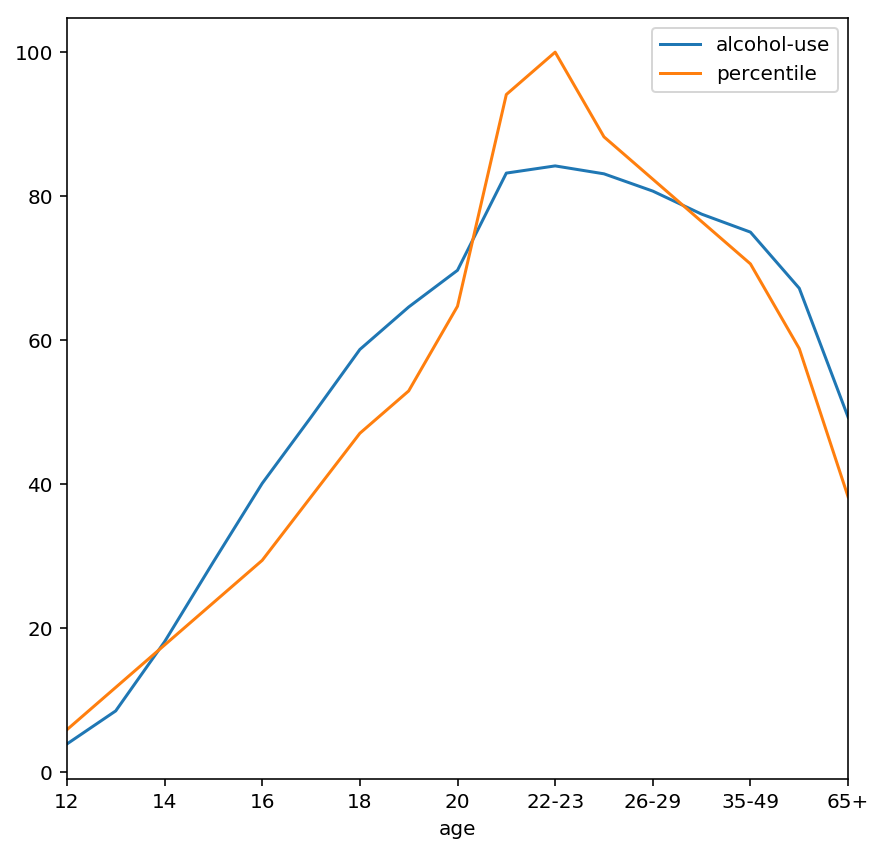

In [255]:
alcohol_df.plot(x='age', figsize=(7,7))

<p style="color:#ff0000;">
Feedback:<br>
Demonstrates ability to analyze diverse dataset. Able to form hypotheses, requires improvement in justifying them with solid statistical testing in NumPy. Ability to visualize and interpret plots using Matplotlib and Seaborn. Documentation and explanation can be improved. 
</p>